已连接到 Python 3.10.6

In [16]:
#
# @lc app=leetcode.cn id=5 lang=python3
#
# [5] 最长回文子串
#
# https://leetcode.cn/problems/longest-palindromic-substring/description/
#
# algorithms
# Medium (37.92%)
# Likes:    7012
# Dislikes: 0
# Total Accepted:    1.6M
# Total Submissions: 4.2M
# Testcase Example:  '"babad"'
#
# 给你一个字符串 s，找到 s 中最长的回文子串。
#
# 如果字符串的反序与原始字符串相同，则该字符串称为回文字符串。
#
#
#
# 示例 1：
#
#
# 输入：s = "babad"
# 输出："bab"
# 解释："aba" 同样是符合题意的答案。
#
#
# 示例 2：
#
#
# 输入：s = "cbbd"
# 输出："bb"
#
#
#
#
# 提示：
#
#
# 1 <= s.length <= 1000
# s 仅由数字和英文字母组成
#
#
#


python

---

`str.join(iterable)`

参数:
- `str`: 要连接的字符串。
- `iterable`: 可迭代对象，其中的元素将被字符串连接。

返回值: 返回一个由可迭代对象中的元素组成的字符串，元素之间用字符串自身作为分隔符进行连接。
```python
numbers = ['1', '2', '3']
result = ''.join(numbers)
print(result)
# Output: 123

fruits = ['apple', 'banana', 'orange']
result = ', '.join(fruits)
print(result)
# Output: apple, banana, orange
```


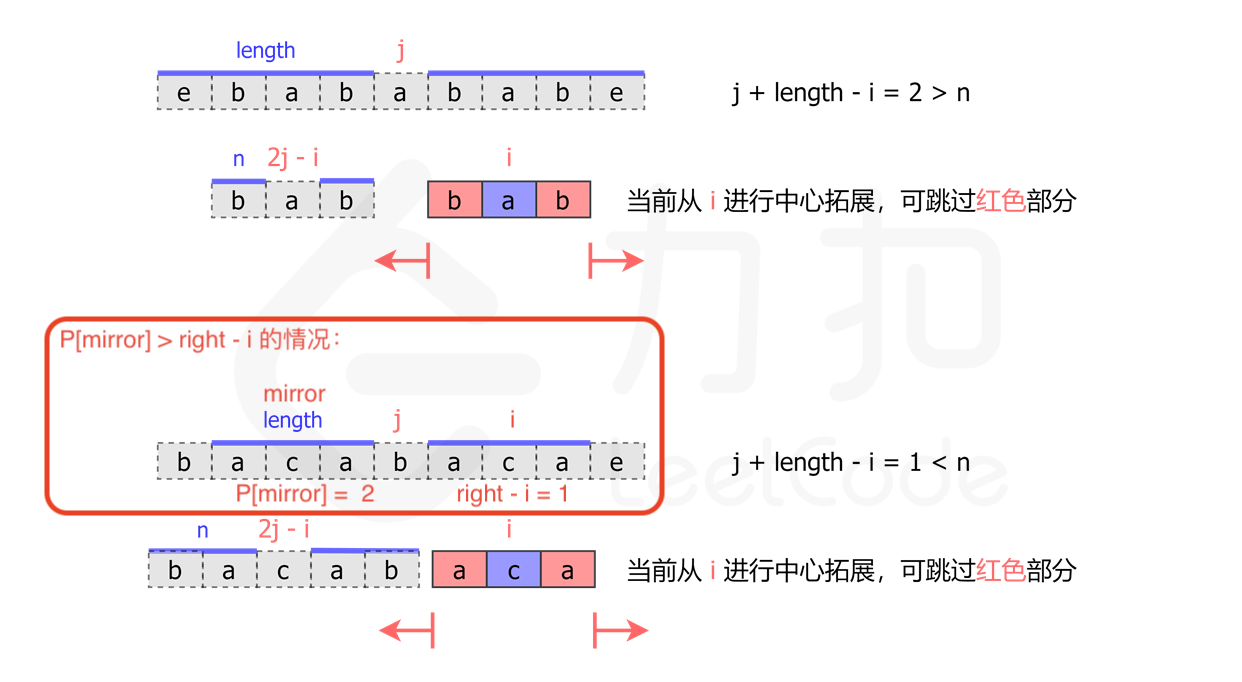

In [17]:

# @lc code=start
class Solution:
    def longestPalindrome(self, s: str) -> str:
        if not s:
            return ""

        # 预处理字符串，使奇偶长度的回文都可以用同一种方式处理
        processed_s = "#".join(s)
        processed_s = "#" + processed_s + "#"

        n = len(processed_s)
        P = [0] * n  # P[i]表示以processed_s[i]为中心的最长回文子串的半径

        center, right = 0, 0  # 当前已知的最右边界和对应的中心

        max_len, max_center = 0, 0  # 最长回文子串的长度和中心位置

        for i in range(n):
            if i < right:
                mirror = 2 * center - i
                P[i] = min(right - i, P[mirror])

            # 尝试扩展以i为中心的回文子串
            a, b = i + (1 + P[i]), i - (1 + P[i]) # b,a为i的左右扩展的边界(b--i--a)
            while a < n and b >= 0 and processed_s[a] == processed_s[b]:
                P[i] += 1
                a += 1
                b -= 1

            # 更新最右边界和对应的中心
            if i + P[i] > right:
                center, right = i, i + P[i]

            # 更新最长回文子串的信息
            if P[i] > max_len:
                max_len, max_center = P[i], i

        start = (max_center - max_len) // 2
        end = start + max_len - 1
        return s[start:end + 1]
# @lc code=end
solution = Solution()
solution.longestPalindrome("babad")

In [ ]:
    # def longestPalindrome(self, s: str) -> str:
    #     # chatgpt写的 中心扩展

    #     n = len(s)
    #     if n < 2:
    #         return s

    #     def expand_around_center(left, right):
    #         '''
    #         子串开始不断地向两边扩展。
    #         如果两边的字母相同，我们就可以继续扩展，例如从 P(i+1,j−1)P(i+1,j-1)P(i+1,j−1) 扩展到 P(i,j)P(i,j)P(i,j)；
    #         如果两边的字母不同，我们就可以停止扩展，因为在这之后的子串都不能是回文串了。
    #         '''
    #         while left >= 0 and right < len(s) and s[left] == s[right]:
    #             left -= 1
    #             right += 1
    #         return left + 1, right - 1

    #     start, end = 0, 0 # 最长回文子串的起始位置和结束位置

    #     for i in range(n):
    #         left1, right1 = expand_around_center(i, i)  # 奇数长度的回文子串
    #         left2, right2 = expand_around_center(i, i + 1)  # 偶数长度的回文子串

    #         if right1 - left1 > end - start:
    #             start, end = left1, right1
    #         if right2 - left2 > end - start:
    #             start, end = left2, right2

    #     return s[start:end + 1]

    # def longestPalindrome(self, s: str) -> str:
        #  chatgpt写的 动态规划

        # n = len(s)
        # if n < 2:
        #     return s
        # # 创建一个二维数组来存储回文子串的信息，dp[i][j]表示s[i:j+1]是否为回文子串
        # dp = [[False] * n for _ in range(n)]

        # start, max_length = 0, 1  # 初始化最长回文子串的起始位置和长度

        # # 所有长度为1的子串都是回文的
        # for i in range(n):
        #     dp[i][i] = True

        # # 遍历长度为2的子串
        # for i in range(n - 1):
        #     if s[i] == s[i + 1]:
        #         dp[i][i + 1] = True
        #         start = i
        #         max_length = 2

        # # 遍历长度大于2的子串
        # for length in range(3, n + 1):
        #     for i in range(n - length + 1):
        #         j = i + length - 1  # 子串的结束位置
        #         if dp[i + 1][j - 1] and s[i] == s[j]: # 如果去掉头尾后的子串是回文串，且头尾字符相等
        #             dp[i][j] = True
        #             start = i
        #             max_length = length
        # return s[start:start + max_length]

    # def longestPalindrome(self, s: str) -> str:
        # # def is_palindrome(s):
        # #     return s == s[::-1]
        # def check_filter_substrings(s, x):
        #     result = [s[start:end] for start in range(len(s)-x+1) for end in range(start+x, len(s)+1)]
        #     for substr in result:
        #         if substr == substr[::-1]:
        #             return (True, substr)
        #     return (False, "")

        # # result = set()
        # # for i in range(len(s)+1):
        # #     for j in range(i+1, len(s)+1):
        # #         result.add(s[i:j])
        # '''
        # left, right, ans = 1, len(s), 0  # 初始化左边界、右边界和答案变量
        # while left <= right:  # 当左边界小于等于右边界时循环
        #     mid = (left + right) // 2  # 计算左边界和右边界的中间值
        #     if check(mid):  # 如果能完成mid个任务
        #         ans = mid  # 更新答案变量
        #         left = mid + 1  # 更新左边界
        #     else:
        #         right = mid - 1  # 更新右边界
        # return ans  # 返回答案
        # '''
        # left, right, ans = 1, len(s), ''  # 初始化左边界、右边界和答案变量
        # while left <= right:  # 当左边界小于等于右边界时循环
        #     mid = (left + right) // 2  # 计算左边界和右边界的中间值
        #     is_palindrome, substr = check_filter_substrings(s, mid)
        #     if is_palindrome: # 如果能完成mid个任务
        #         ans = substr  # 更新答案变量
        #         left = mid + 1  # 更新左边界
        #     else:
        #         right = mid - 1  # 更新右边界
        # return ans  # 返回答案